<a href="https://colab.research.google.com/github/codingCapricorn/K-Means-Algorithm/blob/master/1_K_Means_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means Clustering Algorithm -->>

###An algorithm that tries to minimize the distance of the points in a cluster with their centroid 

###To minimize the sum of distances between the points and their respective cluster centroid


K-Means Clustering is an unsupervised machine learning algorithm.K-means follows Expectation-Maximization(EM) approach to solve the problem. The Expectation-step is used for assigning the data points to the closest cluster and the Maximization-step is used for computing the centroid of each cluster.

In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data. 

Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.


##The real world applications of K-Means include:

(1)customer profiling

(2)market segmentation

(3)computer vision

(4)search engines

(5)astronomy

and much more......

#Basic K-Means Implementations ::::

#Implementation 1 -->>

Generating different blobs

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


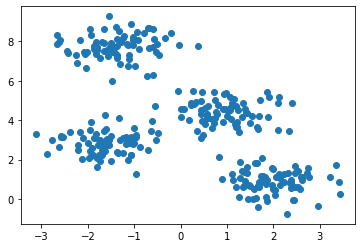

In [ ]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.


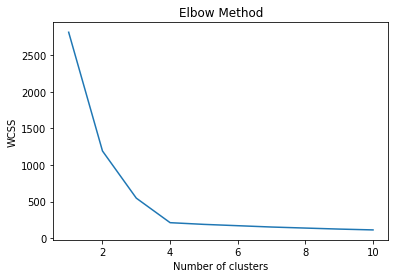

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

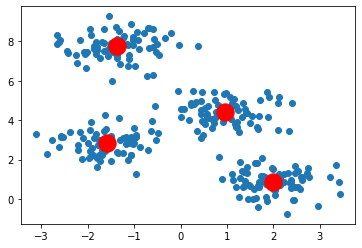

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

#Implementation 2 -->>

Generating 2D dataset containing 4 different blobs

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#The following code will generate the 2D, containing four blobs −
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)

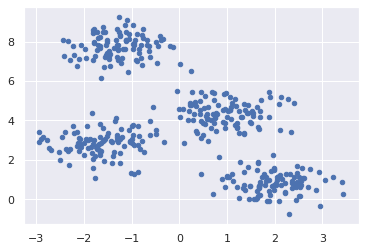

In [ ]:
#visualize the dataset −
plt.scatter(X[:, 0], X[:, 1], s = 20);
plt.show()

In [ ]:
#do the prediction as follows −
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)

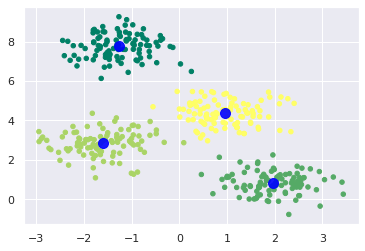

In [ ]:
#visualize the prediction −
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);
plt.show()

#Implementation 3->>

##simple digits dataset

Identifying similar digits without using the original label information.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

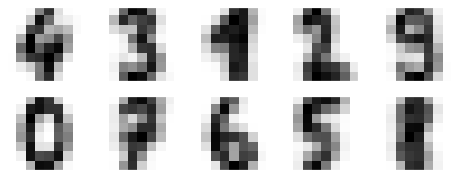

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
              axi.set(xticks=[], yticks=[])
              axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
   mask = (clusters == i)
   labels[mask] = mode(digits.target[mask])[0]
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

###The above output shows that the accuracy is around 80%.